# Métodos de Monte Carlo y Generación de Números Aleatorios

## Física Computacional 1
Juan José Montoya Sánchez


## 1. Conceptos

El método de Monte Carlo es una técnica numérica para resolver un problema de carácter determinista mediante la introducción de un componente aleatorio para simplificarlo. Asi mismo, un número aleatorio es una realización de una variable aleatoria que tiene asociada una ley de probabilidades $F$, en un espacio de probabilidades $(\Omega, \mathcal{R}, P)$.


Dando pie a mencionar que una secuencia de números aleatorios es una sucesión de variables aleatorias $X_1, X_2, \ldots, X_n$ donde:
- Cada variable $X_i$ sigue una distribución uniforme en el intervalo $[0,1]$
- Las variables son independientes

## 2. Métodos de Generación de Números Aleatorios

Existen tres categorías principales:

1. **Métodos Manuales**: Poco prácticos para uso computacional
2. **Mecanismos Analógicos y Tablas**: Dados, ruletas, tablas precalculadas
3. **Métodos Digitales (Pseudoaleatoriedad)**: Algoritmos computacionales que generan secuencias deterministas que simulan aleatoriedad


## 3. Método de los Cuadrados Medios

### Algoritmo

1. Se parte de un número entero $x_0$, la semilla, de $2n$ cifras
2. Se eleva al cuadrado, obteniendo un número de $4n$ cifras. Si no se alcanza dicho número de cifras, se completa con ceros a la izquierda
3. Se considera $x_1$ el número entero constituido por las $2n$ cifras centrales
4. Se eleva al cuadrado $x_1$ y se repite el mecanismo anterior tantas veces como sea preciso
5. En último lugar, se toman los números $u_i = \frac{x_i}{10^{2n}}$, contenidos en el intervalo $(0,1)$

### Ejemplo

Partiendo de $x_0 = 5129$ (con $n=2$, es decir, 4 cifras):

$$x_0 = 5129 \Rightarrow x_0^2 = 26|3066|41 \Rightarrow x_1 = 3066 \Rightarrow u_1 = 0.3066$$

$$x_1 = 3066 \Rightarrow x_1^2 = 9|4003|56 \Rightarrow x_2 = 4003 \Rightarrow u_2 = 0.4003$$

$$x_2 = 4003 \Rightarrow x_2^2 = 16|0240|09 \Rightarrow x_3 = 240 \Rightarrow u_3 = 0.0240$$

$$x_3 = 240 \Rightarrow x_3^2 = 00|0576|00 \Rightarrow x_4 = 576 \Rightarrow u_4 = 0.0576$$

$$x_4 = 576 \Rightarrow x_4^2 = 00|3317|76 \Rightarrow x_5 = 3317 \Rightarrow u_5 = 0.3317$$

$$x_5 = 3317 \Rightarrow x_5^2 = 11|0024|89 \Rightarrow x_6 = 24 \Rightarrow u_6 = 0.0024$$

$$x_6 = 24 \Rightarrow x_6^2 = 00|0005|76 \Rightarrow x_7 = 5 \Rightarrow u_7 = 0.0005$$

$$x_7 = 5 \Rightarrow x_7^2 = 00|0000|25 \Rightarrow x_8 = 0 \Rightarrow u_8 = 0$$

## 4. Métodos Congruenciales

### Definición

La forma general es:

$$x_n = ax_{n-1} + c \pmod{m}$$

Donde $a$, $m$ y $c$ son números enteros positivos, y reciben el nombre de:
- $a$: multiplicador
- $m$: módulo
- $c$: incremento

### Teorema de Periodo Completo

Un generador congruencial tiene periodo completo si se cumplen las siguientes condiciones:

1. $m$ y $c$ son primos relativos
2. Si $q$ es un número primo que divide a $m$, entonces $q$ divide a $a-1$
3. Si $4$ divide a $m$, entonces $4$ divide a $a-1$

### Ejemplo

$$x_n = 5x_{n-1} + 3 \pmod{16}, \quad x_0 = 14$$

Entonces $5 \cdot 14 + 3 = 73$

Por capacidad y desbordamiento de datos, se tiene: $4$ bits (ya que $16 = 2^4$)

$$73 \pmod{16} = 9 \quad \Rightarrow \quad 1001 \text{ (representación binaria)}$$

$$\therefore x_1 = 9$$

# codigo

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

## 5. Método de Cuadrados Medios


Semilla inicial: x₀ = 5129
Número de dígitos (n): 2
Iteraciones: 8

Secuencia normalizada (u_i): [0.3066, 0.4003, 0.024, 0.0576, 0.3317, 0.0024, 0.0005, 0.0]


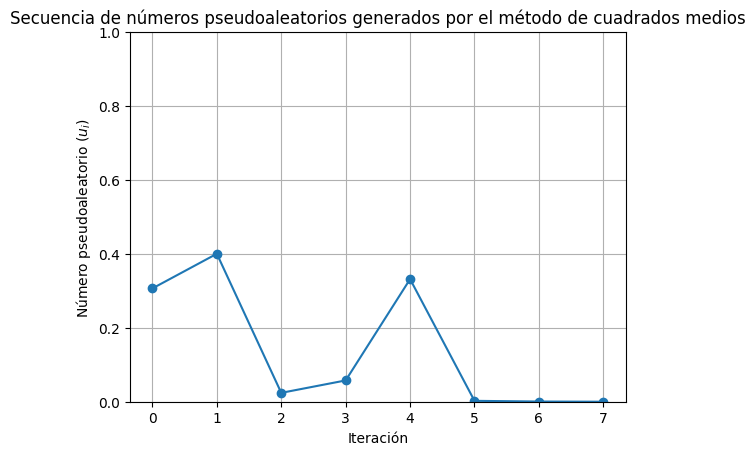

In [8]:
def middle_square_method(x0, n_digits, num_iterations):
    """
    Método de cuadrados medios para generar números pseudoaleatorios.
    
    Parámetros:
    -----------
    x0 : int
        Semilla inicial (debe tener 2n dígitos)
    n_digits : int
        Número de dígitos del lado de la semilla (el número tiene 2n dígitos)
    num_iterations : int
        Número de iteraciones/números a generar
        
    Retorna:
    --------
    x_seq : list
        Secuencia de números enteros x_i
    u_seq : list
        Secuencia de números normalizados u_i en (0,1)
    """
    x_seq = [x0]
    u_seq = []
    
    # Divisor para normalizar (10^(2n))
    divisor = 10 ** (2 * n_digits)
    
    # Número de cifras centrales a extraer
    num_central_digits = 2 * n_digits
    
    for i in range(num_iterations):
        # Elevar al cuadrado
        x_squared = x_seq[-1] ** 2
        
        # Convertir a string y rellenar con ceros a la izquierda (4n dígitos) solo si es necesario, osea si la longitud es menor a 4n
        if len(str(x_squared)) < 4 * n_digits:
            x_squared_str = str(x_squared).zfill(4 * n_digits)
        else:
            x_squared_str = str(x_squared)
        
        # Extraer las 2n cifras centrales
        start_idx = n_digits
        end_idx = start_idx + num_central_digits
        x_central = int(x_squared_str[start_idx:end_idx])
        
        x_seq.append(x_central)
        
        # Normalizar a [0,1]
        u_i = x_central / divisor
        u_seq.append(u_i)
    
    return x_seq, u_seq

# Ejecutar el ejemplo del material: x0 = 5129 (n = 2)
x0 = 5129
n = 2
iterations = 8

x_sequence, u_sequence = middle_square_method(x0, n, iterations)

print(f"\nSemilla inicial: x₀ = {x0}")
print(f"Número de dígitos (n): {n}")
print(f"Iteraciones: {iterations}\n")
print(f"Secuencia normalizada (u_i): {u_sequence}")

plt.plot(u_sequence, marker='o')
plt.title("Secuencia de números pseudoaleatorios generados por el método de cuadrados medios")
plt.xlabel("Iteración")
plt.ylabel("Número pseudoaleatorio ($u_i$)")
plt.ylim(0, 1)
plt.grid()
plt.show()


## 6. Implementación: Método Congruencial Lineal


Fórmula: xₙ = 5·xₙ₋₁ + 3 (mod 16)
Semilla inicial: x₀ = 14
Iteraciones: 8

Secuencia: [14, 9, 0, 3, 2, 13, 4, 7, 6]


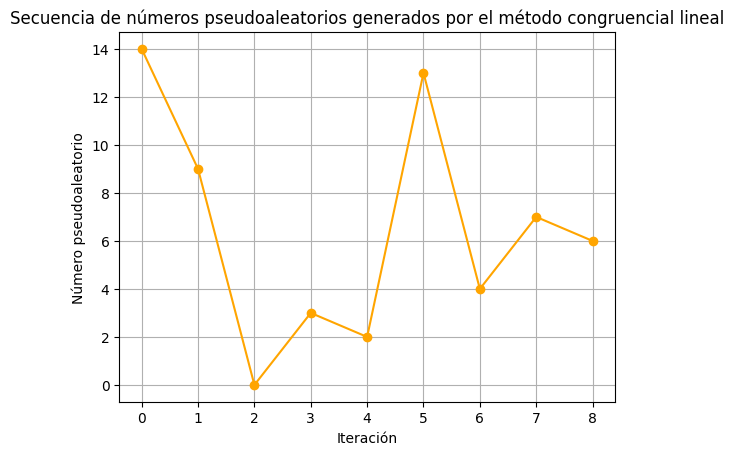

In [17]:
def linear_congruential_generator(x0, a, c, m, num_iterations):
    """
    Método congruencial lineal para generar números pseudoaleatorios.
    
    xₙ = (a·xₙ₋₁ + c) mod m
    
    Parámetros:
    -----------
    x0 : int
        Semilla inicial
    a : int
        Multiplicador
    c : int
        Incremento
    m : int
        Módulo
    num_iterations : int
        Número de iteraciones/números a generar
        
    Retorna:
    --------
    x_seq : list
        Secuencia de números enteros x_i
    """
    x_seq = [x0]
    
    for i in range(num_iterations):
        # Fórmula: xₙ = (a·xₙ₋₁ + c) mod m
        x_next = (a * x_seq[-1] + c) % m
        x_seq.append(x_next)
    
    return x_seq

# Ejemplo del material: xₙ = 5·xₙ₋₁ + 3 (mod 16), x₀ = 14
a = 5
c = 3
m = 16
x0 = 14
iterations = 8

x_seq = linear_congruential_generator(x0, a, c, m, iterations)

print(f"\nFórmula: xₙ = {a}·xₙ₋₁ + {c} (mod {m})")
print(f"Semilla inicial: x₀ = {x0}")
print(f"Iteraciones: {iterations}\n")

print(f"Secuencia: {x_seq}")
plt.plot(x_seq, marker='o', color='orange')
plt.title("Secuencia de números pseudoaleatorios generados por el método congruencial lineal")
plt.xlabel("Iteración")
plt.ylabel("Número pseudoaleatorio")
plt.grid()
plt.show()
